In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
%matplotlib inline

# PROBLEM 1

Read IMUdata using pandas dataframe

In [2]:
imu_data = pd.read_csv('IMUData.csv')

In [3]:
imu_data.head()

,time,gyroscope.X,gyroscope.Y,gyroscope.Z,accelerometer.X,accelerometer.Y,accelerometer.Z,magnetometer.X,magnetometer.Y,magnetometer.Z
0,0.000000,-0.9375,-1.250,0.875,0.019043,-0.052246,0.97803,0.20996,0.031250,-0.44873
1,0.003906,-0.9375,-1.250,0.875,0.019043,-0.052246,0.97803,0.20996,0.031250,-0.44873
2,0.007812,-0.9375,-1.875,0.250,0.019043,-0.067871,0.99756,0.20996,0.031250,-0.44873
3,0.011719,-1.3125,-2.000,0.125,0.026855,-0.032715,0.98975,0.21484,0.041016,-0.45361
4,0.015625,-1.7500,-2.125,0.000,0.003418,-0.032715,0.99365,0.21484,0.041016,-0.45361


,time,gyroscope.X,gyroscope.Y,gyroscope.Z,accelerometer.X,accelerometer.Y,accelerometer.Z,magnetometer.X,magnetometer.Y,magnetometer.Z
0,0.000000,-0.9375,-1.250,0.875,0.019043,-0.052246,0.97803,0.20996,0.031250,-0.44873
1,0.003906,-0.9375,-1.250,0.875,0.019043,-0.052246,0.97803,0.20996,0.031250,-0.44873
2,0.007812,-0.9375,-1.875,0.250,0.019043,-0.067871,0.99756,0.20996,0.031250,-0.44873
3,0.011719,-1.3125,-2.000,0.125,0.026855,-0.032715,0.98975,0.21484,0.041016,-0.45361
4,0.015625,-1.7500,-2.125,0.000,0.003418,-0.032715,0.99365,0.21484,0.041016,-0.45361


In [4]:
imu_data.columns

Index(['time', ' gyroscope.X', ' gyroscope.Y', ' gyroscope.Z',
       ' accelerometer.X', ' accelerometer.Y', ' accelerometer.Z',
       ' magnetometer.X', ' magnetometer.Y', ' magnetometer.Z '],
      dtype='object')

Index(['time', ' gyroscope.X', ' gyroscope.Y', ' gyroscope.Z',
       ' accelerometer.X', ' accelerometer.Y', ' accelerometer.Z',
       ' magnetometer.X', ' magnetometer.Y', ' magnetometer.Z '],
      dtype='object')

## Gyroscope data

In [5]:
gyroscope_data = imu_data[['time', ' gyroscope.X', ' gyroscope.Y', ' gyroscope.Z']].rename(columns = {' gyroscope.X':'x', ' gyroscope.Y':'y', ' gyroscope.Z':'z'})

In [6]:
gyroscope_data.head()

,time,x,y,z
0,0.000000,-0.9375,-1.250,0.875
1,0.003906,-0.9375,-1.250,0.875
2,0.007812,-0.9375,-1.875,0.250
3,0.011719,-1.3125,-2.000,0.125
4,0.015625,-1.7500,-2.125,0.000


,time,x,y,z
0,0.000000,-0.9375,-1.250,0.875
1,0.003906,-0.9375,-1.250,0.875
2,0.007812,-0.9375,-1.875,0.250
3,0.011719,-1.3125,-2.000,0.125
4,0.015625,-1.7500,-2.125,0.000


## Accelerometer data

In [7]:
accelerometer_data = imu_data[['time', ' accelerometer.X', ' accelerometer.Y', ' accelerometer.Z']].rename(columns = {' accelerometer.X':'x', ' accelerometer.Y':'y', ' accelerometer.Z':'z'})

In [8]:
accelerometer_data.head()

,time,x,y,z
0,0.000000,0.019043,-0.052246,0.97803
1,0.003906,0.019043,-0.052246,0.97803
2,0.007812,0.019043,-0.067871,0.99756
3,0.011719,0.026855,-0.032715,0.98975
4,0.015625,0.003418,-0.032715,0.99365


,time,x,y,z
0,0.000000,0.019043,-0.052246,0.97803
1,0.003906,0.019043,-0.052246,0.97803
2,0.007812,0.019043,-0.067871,0.99756
3,0.011719,0.026855,-0.032715,0.98975
4,0.015625,0.003418,-0.032715,0.99365


## Magnetometer data

In [9]:
magnetometer_data = imu_data[['time', ' magnetometer.X', ' magnetometer.Y', ' magnetometer.Z ']].rename(columns = {' magnetometer.X':'x', ' magnetometer.Y':'y', ' magnetometer.Z ':'z'})

In [10]:
magnetometer_data.head()

,time,x,y,z
0,0.000000,0.20996,0.031250,-0.44873
1,0.003906,0.20996,0.031250,-0.44873
2,0.007812,0.20996,0.031250,-0.44873
3,0.011719,0.21484,0.041016,-0.45361
4,0.015625,0.21484,0.041016,-0.45361


,time,x,y,z
0,0.000000,0.20996,0.031250,-0.44873
1,0.003906,0.20996,0.031250,-0.44873
2,0.007812,0.20996,0.031250,-0.44873
3,0.011719,0.21484,0.041016,-0.45361
4,0.015625,0.21484,0.041016,-0.45361


## Convert rotational rate from degrees/sec to radians/sec

In [11]:
def deg2radians(data):
    data[['x', 'y', 'z']] = np.radians(data[['x', 'y', 'z']])
    return data

In [12]:
deg2radians(gyroscope_data).head()

,time,x,y,z
0,0.000000,-0.016362,-0.021817,0.015272
1,0.003906,-0.016362,-0.021817,0.015272
2,0.007812,-0.016362,-0.032725,0.004363
3,0.011719,-0.022907,-0.034907,0.002182
4,0.015625,-0.030543,-0.037088,0.000000


,time,x,y,z
0,0.000000,-0.016362,-0.021817,0.015272
1,0.003906,-0.016362,-0.021817,0.015272
2,0.007812,-0.016362,-0.032725,0.004363
3,0.011719,-0.022907,-0.034907,0.002182
4,0.015625,-0.030543,-0.037088,0.000000


In [13]:
deg2radians(accelerometer_data).head()

,time,x,y,z
0,0.000000,0.000332,-0.000912,0.017070
1,0.003906,0.000332,-0.000912,0.017070
2,0.007812,0.000332,-0.001185,0.017411
3,0.011719,0.000469,-0.000571,0.017274
4,0.015625,0.000060,-0.000571,0.017342


,time,x,y,z
0,0.000000,0.000332,-0.000912,0.017070
1,0.003906,0.000332,-0.000912,0.017070
2,0.007812,0.000332,-0.001185,0.017411
3,0.011719,0.000469,-0.000571,0.017274
4,0.015625,0.000060,-0.000571,0.017342


In [14]:
deg2radians(magnetometer_data).head()

,time,x,y,z
0,0.000000,0.003664,0.000545,-0.007832
1,0.003906,0.003664,0.000545,-0.007832
2,0.007812,0.003664,0.000545,-0.007832
3,0.011719,0.003750,0.000716,-0.007917
4,0.015625,0.003750,0.000716,-0.007917


,time,x,y,z
0,0.000000,0.003664,0.000545,-0.007832
1,0.003906,0.003664,0.000545,-0.007832
2,0.007812,0.003664,0.000545,-0.007832
3,0.011719,0.003750,0.000716,-0.007917
4,0.015625,0.003750,0.000716,-0.007917


## Normalize magnitude of both the accelerometer and magnetometer, $v = \frac{(w_x, w_y, w_z)} {||w||}$

In [15]:
def data_normalized(data):
    data = data.copy()
    magnitude = np.sqrt(np.square(data[['x', 'y', 'z']]).sum(axis=1))
    data[['x', 'y', 'z']] = data[['x', 'y', 'z']].div(magnitude, axis=0)
    return data

In [16]:
data_normalized(accelerometer_data).head()

,time,x,y,z
0,0.000000,0.019439,-0.053333,0.998388
1,0.003906,0.019439,-0.053333,0.998388
2,0.007812,0.019042,-0.067868,0.997513
3,0.011719,0.027108,-0.033024,0.999087
4,0.015625,0.003438,-0.032906,0.999453


,time,x,y,z
0,0.000000,0.019439,-0.053333,0.998388
1,0.003906,0.019439,-0.053333,0.998388
2,0.007812,0.019042,-0.067868,0.997513
3,0.011719,0.027108,-0.033024,0.999087
4,0.015625,0.003438,-0.032906,0.999453


In [17]:
data_normalized(magnetometer_data).head()

,time,x,y,z
0,0.000000,0.422961,0.062953,-0.903959
1,0.003906,0.422961,0.062953,-0.903959
2,0.007812,0.422961,0.062953,-0.903959
3,0.011719,0.426619,0.081448,-0.900757
4,0.015625,0.426619,0.081448,-0.900757


,time,x,y,z
0,0.000000,0.422961,0.062953,-0.903959
1,0.003906,0.422961,0.062953,-0.903959
2,0.007812,0.422961,0.062953,-0.903959
3,0.011719,0.426619,0.081448,-0.900757
4,0.015625,0.426619,0.081448,-0.900757


source [wikipedia](https://en.wikipedia.org/wiki/Conversion_between_quaternions_and_Euler_angles)  
The Euler angles: yaw (Y), pitch (X), roll (Z)

In [18]:
def euler2quaternions(yaw, pitch, roll):
    # Abbreviations for the various angular functions
    cy = np.cos(yaw * 0.5)
    sy = np.sin(yaw * 0.5)
    cp = np.cos(pitch * 0.5)
    sp = np.sin(pitch * 0.5)
    cr = np.cos(roll * 0.5)
    sr = np.sin(roll * 0.5)

    q_w = cy * cp * cr + sy * sp * sr
    q_x = cy * cp * sr - sy * sp * cr
    q_y = sy * cp * sr + cy * sp * cr
    q_z = sy * cp * cr - cy * sp * sr
    return np.array([[q_w, q_x, q_y, q_z]])

Euler angles ψ, θ and φ in the so called aerospace sequence describe an orientation of frame B achieved by the sequential rotations, from alignment with frame A, of ψ around
5
zˆB, θ around yˆB, and φ around xˆB. This Euler angle representation of ABqˆ is defined by equations (7), (8) and (9).  
ψ = Atan2(2q2q3 − 2q1q4, 2q12 + 2q2 − 1􏰃)  
θ = −sin−1 (2q2q4 + 2q1q3)  
φ = Atan2(2q3q4 − 2q1q2, 2q12 + 2q42 − 1􏰃)

In [49]:
def quaternions2euler(quaternion):
    q_w = quaternion[0]
    q_x = quaternion[1]
    q_y = quaternion[2]
    q_z = quaternion[3]

    # roll (z-axis rotation)
    roll = math.atan2(2 * q_x * q_y - 2 * q_w * q_z, 2 * q_w * q_w + 2 * q_x * q_x - 1)

    # pitch (x-axis rotation)
    pitch = math.atan2(2 * q_y * q_z - 2 * q_w * q_x, 2 * q_w * q_w + 2 * q_z * q_z - 1)

    # yaw (y-axis rotation)
    yaw = -math.asin(2 * q_x * q_z + 2 * q_w * q_y) 
    return np.array([[pitch, yaw, roll]])

The quaternion conjugate has the form of
q' = q0 − iq1 − jq2 − kq3

In [20]:
def quaternions_conjugate(quaternion):
    return quaternion * np.array([[1, -1, -1, -1]])

In [21]:
def quaternions_product(a, b):
    w0, x0, y0, z0 = a[0]
    w1, x1, y1, z1 = b[0]
    return np.array([[w0 * w1 - x0 * x1 - y0 * y1 - z0 * z1,
                     w0 * x1 + x0 * w1 + y0 * z1 - z0 * y1,
                     w0 * y1 - x0 * z1 + y0 * w1 + z0 * x1,
                     w0 * z1 + x0 * y1 - y0 * x1 + z0 * w1]], dtype=np.float64)

In [22]:
a = np.array([[1,0,0,0]])
b = np.array([[1,2,3,4]])

In [23]:
quaternions_product(a,b)

array([[1., 2., 3., 4.]])

array([[1., 2., 3., 4.]])

# PROBLEM 2

$ q(v, \theta) = (cos(\theta/2), v_x sin(\theta/2), v_y sin(\theta/2), v_z sin(\theta/2)) $

In [24]:
def axisAngle2quaternion(axis, angle):
    v_x, v_y, v_z = axis[0]
    half_angle = angle / 2
    return np.array([[math.cos(half_angle), v_x * math.sin(half_angle), v_y * math.sin(half_angle), v_z * math.sin(half_angle)]])

### dead reckoning filter 
$q_{k-1}$ represent the estimated orientation at stage k - 1, $q_0$ equals the intial, identity quaternion.  
$q(v, \theta)$ represent the axis-angle representation of gyroscope reading at stage k, $w_k$, where $v = \frac{w_k}{||w_k||}$ and $\theta = ||w_k||\Delta t$  
The estimated orientation for the stage k:
$$q_{k} = q_{k-1} \otimes q(v, \theta)$$

In [25]:
q = np.array([[1.0,0,0,0]])
orientation_est = [q]
dt = 0.003906
for index, row in gyroscope_data.iterrows():
    q_gyro = np.array([[0, row['x'], row['y'], row['z']]])
    q_dot = 0.5 * quaternions_product(q, q_gyro)
    q = np.add(q, q_dot * dt)
    q = np.divide(q, np.sqrt(np.sum(np.square(q)))) #normalize
    orientation_est += [q]

In [26]:
orientation_est

[array([[1., 0., 0., 0.]]),
 array([[ 0.99999388, -0.00183093, -0.00244124,  0.00170886]]),
 array([[ 0.99997554, -0.00366183, -0.00488244,  0.00341771]]),
 array([[ 0.99994078, -0.00548254, -0.00854862,  0.00391038]]),
 array([[ 0.99988144, -0.00803243, -0.01246294,  0.00415395]]),
 array([[ 0.99978782, -0.01143237, -0.01662653,  0.00414463]]),
 array([[ 0.99966444, -0.01445826, -0.0211584 ,  0.00377936]]),
 array([[ 0.99952711, -0.01687976, -0.02543984,  0.00366741]]),
 array([[ 0.99938926, -0.01881468, -0.02923095,  0.00355956]]),
 array([[ 0.99925594, -0.02039223, -0.03252775,  0.00369715]]),
 array([[ 0.99914364, -0.02160238, -0.03509353,  0.0037097 ]]),
 array([[ 0.99902731, -0.02332771, -0.03715719,  0.00442629]]),
 array([[ 0.99893879, -0.02493926, -0.03836363,  0.00524939]]),
 array([[ 0.99882354, -0.02729629, -0.03956453,  0.00641016]]),
 array([[ 0.99868038, -0.03013995, -0.04089008,  0.00755489]]),
 array([[ 0.99847946, -0.03335831, -0.04293819,  0.0090723 ]]),
 array([[ 0.

[array([[1., 0., 0., 0.]]),
 array([[ 0.99999388, -0.00183093, -0.00244124,  0.00170886]]),
 array([[ 0.99997554, -0.00366183, -0.00488244,  0.00341771]]),
 array([[ 0.99994078, -0.00548254, -0.00854862,  0.00391038]]),
 array([[ 0.99988144, -0.00803243, -0.01246294,  0.00415395]]),
 array([[ 0.99978782, -0.01143237, -0.01662653,  0.00414463]]),
 array([[ 0.99966444, -0.01445826, -0.0211584 ,  0.00377936]]),
 array([[ 0.99952711, -0.01687976, -0.02543984,  0.00366741]]),
 array([[ 0.99938926, -0.01881468, -0.02923095,  0.00355956]]),
 array([[ 0.99925594, -0.02039223, -0.03252775,  0.00369715]]),
 array([[ 0.99914364, -0.02160238, -0.03509353,  0.0037097 ]]),
 array([[ 0.99902731, -0.02332771, -0.03715719,  0.00442629]]),
 array([[ 0.99893879, -0.02493926, -0.03836363,  0.00524939]]),
 array([[ 0.99882354, -0.02729629, -0.03956453,  0.00641016]]),
 array([[ 0.99868038, -0.03013995, -0.04089008,  0.00755489]]),
 array([[ 0.99847946, -0.03335831, -0.04293819,  0.0090723 ]]),
 array([[ 0.

In [31]:
def imu_gyro(n, gyroscope_data, 
                      dt=0.003906):
    '''
        Parameters
        ----------
        n: scalar
          number of data for all readings, ex. imu_data.shape[0]
        gyroscope_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a gyroscope
        dt: scalar
          observations reported rate in seconds, ex. dt = 265Hz = 0.003906s

        Return
        ----------
        q: a matrix with n rows and 4 columns
          orientations estimated for all n readings after applying tilt and yaw drift corrections
    '''

    q = [np.array([[1.0,0,0,0]])]
    for i in range(n):
        ### gyroscope estimations
        gyro_row = gyroscope_data.loc[i]
        w_k = np.array([[gyro_row['x'], gyro_row['y'], gyro_row['z']]])
        l = np.sqrt(np.sum(np.square(w_k)))
        v = np.divide(w_k, l)
        theta = l * dt 
        q_gyro = axisAngle2quaternion(v, theta)
        q_k = quaternions_product(q[i], q_gyro)

        q += [q_k]
    
    # return result excluding the identity quaternion used for initial estimations
    return np.array(q[1:])

In [32]:
gyroscope_radians = deg2radians(gyroscope_data)
n = imu_data.shape[0]

imu_gyro(n, gyroscope_radians)

array([[[ 9.99999998e-01, -3.19558878e-05, -4.26078503e-05,
          2.98254952e-05]],

       [[ 9.99999993e-01, -6.39117754e-05, -8.52157005e-05,
          5.96509904e-05]],

       [[ 9.99999982e-01, -9.58645765e-05, -1.49128837e-04,
          6.81739218e-05]],

       ...,

       [[ 9.93898441e-01, -2.14084281e-02,  1.61327660e-02,
          1.06992069e-01]],

       [[ 9.93877907e-01, -2.14031832e-02,  1.56499547e-02,
          1.07255246e-01]],

       [[ 9.93855254e-01, -2.14061131e-02,  1.52050223e-02,
          1.07528225e-01]]])

array([[[ 9.99999998e-01, -3.19558878e-05, -4.26078503e-05,
          2.98254952e-05]],

       [[ 9.99999993e-01, -6.39117754e-05, -8.52157005e-05,
          5.96509904e-05]],

       [[ 9.99999982e-01, -9.58645765e-05, -1.49128837e-04,
          6.81739218e-05]],

       ...,

       [[ 9.93898441e-01, -2.14084281e-02,  1.61327660e-02,
          1.06992069e-01]],

       [[ 9.93877907e-01, -2.14031832e-02,  1.56499547e-02,
          1.07255246e-01]],

       [[ 9.93855254e-01, -2.14061131e-02,  1.52050223e-02,
          1.07528225e-01]]])

# PROBLEM 3

## Gravity based tilt correction using the accelerometer

Transform acceleration measurements into the global frame
$$\hat{u} = q^{-1}_{k} \otimes \tilde{a} \otimes q_{k}$$
$\hat{u}$ is a direct estimate of the gravity vector, $q^{-1}_k$ will be quaternion conjugate as q is assumed to be a  unit quaternion  
To calculate the axis, project $\hat{u}$ into the XZ plane to obtain $(\hat{u}_x,0,\hat{u}_z)$. The tilt axis is orthogonal: $t = (\hat{u}_z,0,−\hat{u}_x)$  
The tilt error φ is the angle between $\hat{u}$ and the vector (0, 1, 0).  
The output of the complementary filter with gain $\alpha\ll1$ is
$$q_{k}' = q(t, -\alpha\phi) \otimes q_{k}$$
in which t is the tilt axis. The parameter $\alpha$ should be large enough to correct all drift, but small enough so that the corrections are imperceptible to the user.

In [29]:
def imu_gyro_acc(n, gyroscope_data, accelerometer_data,
                      dt=0.003906,alpha=0.01):
    '''
        Parameters
        ----------
        n: scalar
          number of data for all readings, ex. imu_data.shape[0]
        gyroscope_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a gyroscope
        accelerometer_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a accelerometer, observations must be normalized
        dt: scalar
          observations reported rate in seconds, ex. dt = 265Hz = 0.003906s
        alpha: scalar
          parameter used for tilt correction

        Return
        ----------
        q: a matrix with n rows and 4 columns
          orientations estimated for all n readings after applying tilt and yaw drift corrections
    '''

    q = [np.array([[1.0,0,0,0]])]
    for i in range(n):
        ### gyroscope estimations
        gyro_row = gyroscope_data.loc[i]
        w_k = np.array([[gyro_row['x'], gyro_row['y'], gyro_row['z']]])
        l = np.sqrt(np.sum(np.square(w_k)))
        v = np.divide(w_k, l)
        theta = l * dt 
        q_gyro = axisAngle2quaternion(v, theta)
        q_k = quaternions_product(q[i], q_gyro)

        ### accelerometer estimations - tilt error correction (define up)
        q_conj = quaternions_conjugate(q_k)
        acc_row = accelerometer_data.loc[i]
        a = np.array([[0, acc_row['x'], acc_row['y'], acc_row['z']]])
        u = quaternions_product(q_conj, quaternions_product(a, q_k)) # global frame
        t = np.array([[u[0][3], 0, -u[0][1]]]) # tilt axis
        phi = math.acos(np.dot(np.array([0, 1, 0]), u[0][1:])) # tilt error angle
        q_t = axisAngle2quaternion(t, -alpha*phi) # complementary filter for tilt drift
        q_k = quaternions_product(q_t, q_k)   

        q += [q_k]
    
    # return result excluding the identity quaternion used for initial estimations
    return np.array(q[1:])

In [34]:
gyroscope_radians = deg2radians(gyroscope_data)
accelerometer_radians = deg2radians(accelerometer_data)
accelerometer_narmalized = data_normalized(accelerometer_radians)
n = imu_data.shape[0]

imu_gyro_acc(n, gyroscope_radians, accelerometer_narmalized)

array([[[ 9.99966758e-01, -8.13982368e-03, -4.23696899e-05,
          1.88702445e-04]],

       [[ 9.99865962e-01, -1.63521398e-02, -8.42584706e-05,
          3.80169443e-04]],

       [[ 9.99694238e-01, -2.46958286e-02, -1.47428075e-04,
          5.51986098e-04]],

       ...,

       [[-4.59368194e-01, -5.29016833e-02,  5.39950181e-01,
          3.63155368e-01]],

       [[-4.60257306e-01, -5.40359547e-02,  5.40081832e-01,
          3.61641379e-01]],

       [[-4.61161637e-01, -5.51518241e-02,  5.40205010e-01,
          3.60111286e-01]]])

array([[[ 9.99966758e-01, -8.13982368e-03, -4.23696899e-05,
          1.88702445e-04]],

       [[ 9.99865962e-01, -1.63521398e-02, -8.42584706e-05,
          3.80169443e-04]],

       [[ 9.99694238e-01, -2.46958286e-02, -1.47428075e-04,
          5.51986098e-04]],

       ...,

       [[-4.59368194e-01, -5.29016833e-02,  5.39950181e-01,
          3.63155368e-01]],

       [[-4.60257306e-01, -5.40359547e-02,  5.40081832e-01,
          3.61641379e-01]],

       [[-4.61161637e-01, -5.51518241e-02,  5.40205010e-01,
          3.60111286e-01]]])

# PROBLEM 4

## Yaw drift

The complementary filter for yaw correction is
$$q_{k}' = q((0,1,0), -\alpha_2(\theta - \theta_r)) \otimes q_{k}$$
in which $\alpha_2$ is a small gain constant, similar to the case of tilt correction.

In [36]:
def imu_gyro_acc_magn(n, gyroscope_data, accelerometer_data, magnetometer_data,
                      dt=0.003906,alpha=0.01, alpha_2=0.01, eps=1e-6):
    '''
        Parameters
        ----------
        n: scalar
          number of data for all readings, ex. imu_data.shape[0]
        gyroscope_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a gyroscope
        accelerometer_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a accelerometer, observations must be normalized
        magnetometer_data: pandas dataframe that must contain x, y, z columns and has n rows
          observations obtained from a magnetometer, observations must be normalized
        dt: scalar
          observations reported rate in seconds, ex. dt = 265Hz = 0.003906s
        alpha: scalar
          parameter used for tilt correction
        alpha_2: scalar 
          parameter used for yaw drift correction
        eps: scalar 
          epsilon used for detecting yaw drift

        Return
        ----------
        q: a matrix with n rows and 4 columns
          orientations estimated for all n readings after applying tilt and yaw drift corrections
    '''

    q = [np.array([[1.0,0,0,0]])]
    for i in range(n):
        ### gyroscope estimations
        gyro_row = gyroscope_data.loc[i]
        w_k = np.array([[gyro_row['x'], gyro_row['y'], gyro_row['z']]])
        l = np.sqrt(np.sum(np.square(w_k)))
        v = np.divide(w_k, l)
        theta = l * dt 
        q_gyro = axisAngle2quaternion(v, theta)
        q_k = quaternions_product(q[i], q_gyro)

        ### accelerometer estimations - tilt error correction (define up)
        q_conj = quaternions_conjugate(q_k)
        acc_row = accelerometer_data.loc[i]
        a = np.array([[0, acc_row['x'], acc_row['y'], acc_row['z']]])
        u = quaternions_product(q_conj, quaternions_product(a, q_k)) # global frame
        t = np.array([[u[0][3], 0, -u[0][1]]]) # tilt axis
        phi = math.acos(np.dot(np.array([0, 1, 0]), u[0][1:])) # tilt error angle
        q_t = axisAngle2quaternion(t, -alpha*phi) # complementary filter for tilt drift
        q_k = quaternions_product(q_t, q_k)   

        ### magnetometer estimations - yaw drift correction
        q_conj = quaternions_conjugate(q_k)
        if i == 0:
            m_ref_row = magnetometer_data.loc[i]
            m_ref_obv = np.array([[0, m_ref_row['x'], m_ref_row['y'], m_ref_row['z']]]) # intial observed value used as reference
            m_ref = quaternions_product(q_conj, quaternions_product(m_ref_obv, q_k))
            theta_ref = math.atan2(m_ref[0][1], m_ref[0][3])
        magn_row = magnetometer_data.loc[i]
        m_obv = np.array([[0, magn_row['x'], magn_row['y'], magn_row['z']]]) # observed magnetometer reading
        m = quaternions_product(q_conj, quaternions_product(m_obv, q_k)) # estimate by world frame
        theta_m = math.atan2(m[0][1], m[0][3])
        # compare m_ref theta to current m theta for yaw drift 
        # if difference is more than epsilon (tolerable floating point error)
        if np.abs(theta_m - theta_ref) > eps:
            q_m = axisAngle2quaternion(np.array([[0, 1, 0]]), -alpha_2*(theta_m - theta_ref)) # complementry filter for yaw drift
            q_k = quaternions_product(q_m, q_k)

        q += [q_k]
    
    # return result excluding the identity quaternion used for initial estimations
    return np.array(q[1:])

In [51]:
gyroscope_radians = deg2radians(gyroscope_data)
accelerometer_radians = deg2radians(accelerometer_data)
magnetometer_radians = deg2radians(magnetometer_data)
accelerometer_narmalized = data_normalized(accelerometer_radians)
magnetometer_narmalized = data_normalized(magnetometer_data)
n = imu_data.shape[0]

imu_gyro_acc_magn(n, gyroscope_radians, accelerometer_narmalized, magnetometer_narmalized)

array([[[ 9.99966758e-01, -8.13982368e-03, -4.23696899e-05,
          1.88702445e-04]],

       [[ 9.99865962e-01, -1.63521388e-02, -8.15623811e-05,
          3.80213536e-04]],

       [[ 9.99694239e-01, -2.46958256e-02, -1.38931832e-04,
          5.52106168e-04]],

       ...,

       [[ 4.60025888e-01, -4.35262771e-01, -3.88822421e-01,
          3.31516690e-01]],

       [[ 4.58904767e-01, -4.35821244e-01, -3.89956845e-01,
          3.30872293e-01]],

       [[ 4.57753680e-01, -4.36383067e-01, -3.91097814e-01,
          3.30247402e-01]]])

array([[[ 9.99966758e-01, -8.13982368e-03, -4.23696899e-05,
          1.88702445e-04]],

       [[ 9.99865962e-01, -1.63521388e-02, -8.15623811e-05,
          3.80213536e-04]],

       [[ 9.99694239e-01, -2.46958256e-02, -1.38931832e-04,
          5.52106168e-04]],

       ...,

       [[ 4.60025888e-01, -4.35262771e-01, -3.88822421e-01,
          3.31516690e-01]],

       [[ 4.58904767e-01, -4.35821244e-01, -3.89956845e-01,
          3.30872293e-01]],

       [[ 4.57753680e-01, -4.36383067e-01, -3.91097814e-01,
          3.30247402e-01]]])

# PROBLEM 5

## 2D plots of initial data

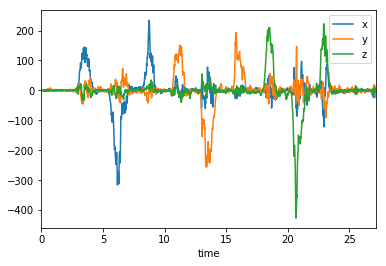

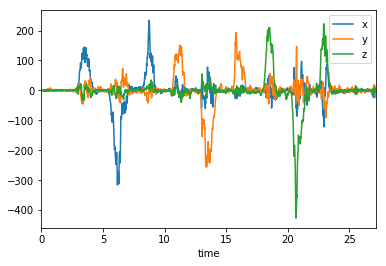

In [38]:
gyroscope_data[['time', 'x', 'y', 'z']].plot(x='time')

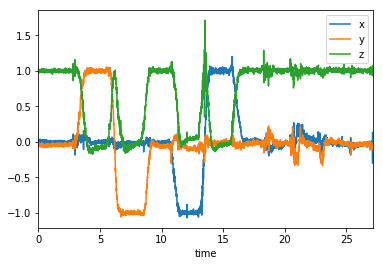

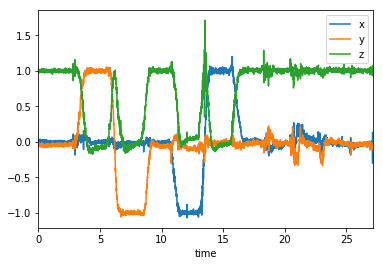

In [39]:
accelerometer_data[['time', 'x', 'y', 'z']].plot(x='time')

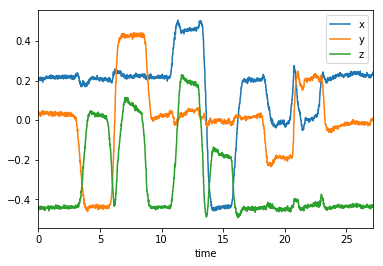

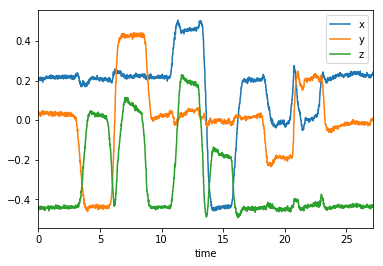

In [40]:
magnetometer_data[['time', 'x', 'y', 'z']].plot(x='time')

## 2D plots for Euler angles for the 3 implemented methods (gyroscope integration, gyroscope + accelerometer, gyroscope + accelerometer + magnetometer)

In [52]:
gyroscope_radians = deg2radians(gyroscope_data)
accelerometer_radians = deg2radians(accelerometer_data)
magnetometer_radians = deg2radians(magnetometer_data)
accelerometer_narmalized = data_normalized(accelerometer_radians)
magnetometer_narmalized = data_normalized(magnetometer_data)
n = imu_data.shape[0]

q_imu_gyro = imu_gyro(n, gyroscope_radians)
q_imu_gyro_acc = imu_gyro_acc(n, gyroscope_radians, accelerometer_narmalized)
q_imu_gyro_acc_magn = imu_gyro_acc_magn(n, gyroscope_radians, accelerometer_narmalized, magnetometer_narmalized)

# convert quaternions to euler angles
euler_imu_gyro = np.apply_along_axis(quaternions2euler, 2, q_imu_gyro)
euler_imu_gyro_acc = np.apply_along_axis(quaternions2euler, 2, q_imu_gyro_acc)
euler_imu_gyro_acc_magn = np.apply_along_axis(quaternions2euler, 2, q_imu_gyro_acc_magn)

# computed euler angles are in randians so convert them to degrees
euler_imu_gyro = np.apply_along_axis(np.rad2deg, 2, euler_imu_gyro)
euler_imu_gyro_acc = np.apply_along_axis(np.rad2deg, 2, euler_imu_gyro_acc)
euler_imu_gyro_acc_magn = np.apply_along_axis(np.rad2deg, 2, euler_imu_gyro_acc_magn)

plt.clf()

colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

i = 0
num_colours = len(colours)

plt.ylim(0,1000)

# plot degree distribution
plt.xlabel('p')
plt.ylabel('search time')
plt.title('Search time vs p for ' + plot_name)
for dist in p_search_time_dists:
    q, p_search_time = dist
    xdata = []
    ydata = []
    for p in p_search_time:
        xdata += [p]
        ydata += [p_search_time[p]]
    plt.plot(xdata, ydata, marker='.', linestyle='-', color=colours[i % num_colours], label='q = ' + str(q))
    i += 1
plt.legend(loc='upper right')